# Installing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


# Loading Dataset

In [2]:
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')
users_df = pd.read_csv('Users.csv')

# Display the first few rows of each DataFrame
print("Products Data:")
print(products_df.head())

print("\nTransactions Data:")
print(transactions_df.head())

print("\nUsers Data:")
print(users_df.head())

Products Data:
          CATEGORY_1              CATEGORY_2                   CATEGORY_3  \
0  Health & Wellness           Sexual Health  Conductivity Gels & Lotions   
1             Snacks           Puffed Snacks         Cheese Curls & Puffs   
2  Health & Wellness               Hair Care        Hair Care Accessories   
3  Health & Wellness               Oral Care                   Toothpaste   
4  Health & Wellness  Medicines & Treatments               Essential Oils   

  CATEGORY_4                                       MANUFACTURER  \
0        NaN                                                NaN   
1        NaN                                                NaN   
2        NaN                           PLACEHOLDER MANUFACTURER   
3        NaN                                  COLGATE-PALMOLIVE   
4        NaN  MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...   

             BRAND       BARCODE  
0              NaN  7.964944e+11  
1              NaN  2.327801e+10  
2          ELE

# EDA of Datasets

In [3]:
# 1. Basic info for each dataset
print("Products Data Info:")
print(products_df.info())
print("\nTransactions Data Info:")
print(transactions_df.info())
print("\nUsers Data Info:")
print(users_df.info())

# 2. Summary statistics for numeric columns
print("\nProducts Data Summary:")
print(products_df.describe())
print("\nTransactions Data Summary:")
print(transactions_df.describe())
print("\nUsers Data Summary:")
print(users_df.describe())

Products Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141838 entries, 0 to 141837
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    141818 non-null  object 
 1   CATEGORY_2    141599 non-null  object 
 2   CATEGORY_3    131766 non-null  object 
 3   CATEGORY_4    11329 non-null   object 
 4   MANUFACTURER  103652 non-null  object 
 5   BRAND         103652 non-null  object 
 6   BARCODE       141157 non-null  float64
dtypes: float64(1), object(6)
memory usage: 4.3+ MB
None

Transactions Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID  

Missing Values in Products Data:
CATEGORY_1          20
CATEGORY_2         239
CATEGORY_3       10072
CATEGORY_4      130509
MANUFACTURER     38186
BRAND            38186
BARCODE            681
dtype: int64

Missing Values in Transactions Data:
RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64

Missing Values in Users Data:
ID                  0
CREATED_DATE        1
BIRTH_DATE       2149
STATE            2804
LANGUAGE        17843
GENDER           3447
dtype: int64


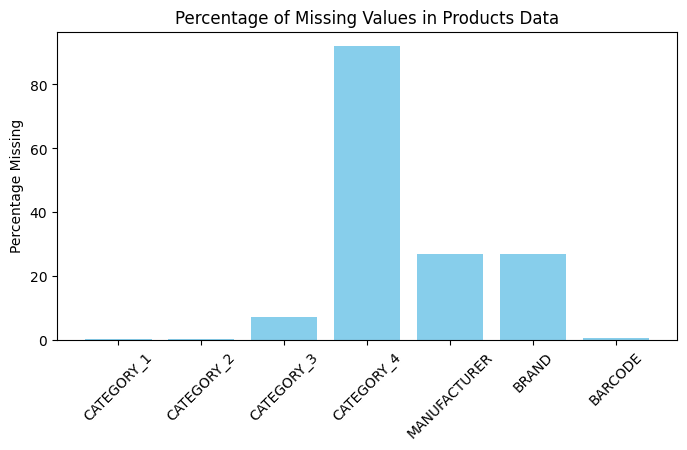

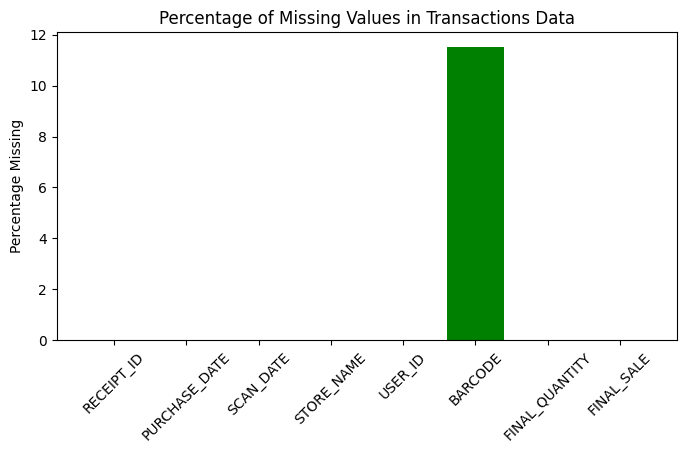

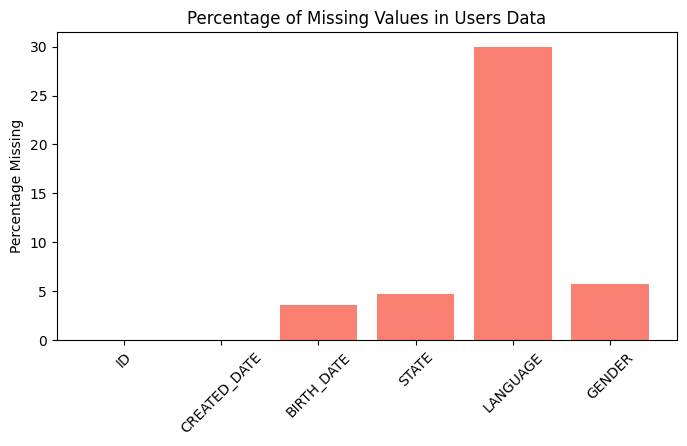

In [4]:
# 3. Check for missing values
print("Missing Values in Products Data:")
print(products_df.isnull().sum())

print("\nMissing Values in Transactions Data:")
print(transactions_df.isnull().sum())

print("\nMissing Values in Users Data:")
print(users_df.isnull().sum())


# Function to calculate percentage of missing values
def missing_values_percentage(df):
    return (df.isnull().sum() / len(df)) * 100

# Plot missing values percentage for each dataset
plt.figure(figsize=(8, 4))
plt.bar(missing_values_percentage(products_df).index, missing_values_percentage(products_df), color='skyblue')
plt.title("Percentage of Missing Values in Products Data")
plt.ylabel("Percentage Missing")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 4))
plt.bar(missing_values_percentage(transactions_df).index, missing_values_percentage(transactions_df), color='green')
plt.title("Percentage of Missing Values in Transactions Data")
plt.ylabel("Percentage Missing")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 4))
plt.bar(missing_values_percentage(users_df).index, missing_values_percentage(users_df), color='salmon')
plt.title("Percentage of Missing Values in Users Data")
plt.ylabel("Percentage Missing")
plt.xticks(rotation=45)
plt.show()

In [5]:
# 4. Check for duplicate records
print("Duplicate Rows in Products Data:", products_df.duplicated().sum())
print("Duplicate Rows in Transactions Data:", transactions_df.duplicated().sum())
print("Duplicate Rows in Users Data:", users_df.duplicated().sum())

Duplicate Rows in Products Data: 9
Duplicate Rows in Transactions Data: 171
Duplicate Rows in Users Data: 0


In [6]:
# 5. Top 10 product categories by number of transactions
top_categories = transactions_df.merge(products_df, on='BARCODE')['CATEGORY_1'].value_counts().head(10)
print("Top 10 Product Categories by Transactions:")
print(top_categories)

Top 10 Product Categories by Transactions:
CATEGORY_1
Health & Wellness        2213684
Snacks                   1575480
Restaurant                 46096
Alcohol                    28842
Dairy                      23064
Beverages                  17498
Apparel & Accessories      17286
Deli & Bakery               5768
Pantry                        46
Needs Review                   6
Name: count, dtype: int64


In [7]:
# 6. Top 10 brands by number of transactions
top_brands = transactions_df.merge(products_df, on='BARCODE')['BRAND'].value_counts().head(10)
print("Top 10 Brands by Transactions:")
print(top_brands)

Top 10 Brands by Transactions:
BRAND
NATURIUM                         40334
OLD SPICE                        34584
ORIBE                            34572
REESE'S                          28854
SARGENTO                         28832
AVEENO                           28814
COCA-COLA                        23318
CHEETOS                          23126
PEPSI                            23116
ENTENMANN'S SWEET BAKED GOODS    23080
Name: count, dtype: int64
